<a href="https://colab.research.google.com/github/11kraj/VideoGames_Sales/blob/main/MLassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

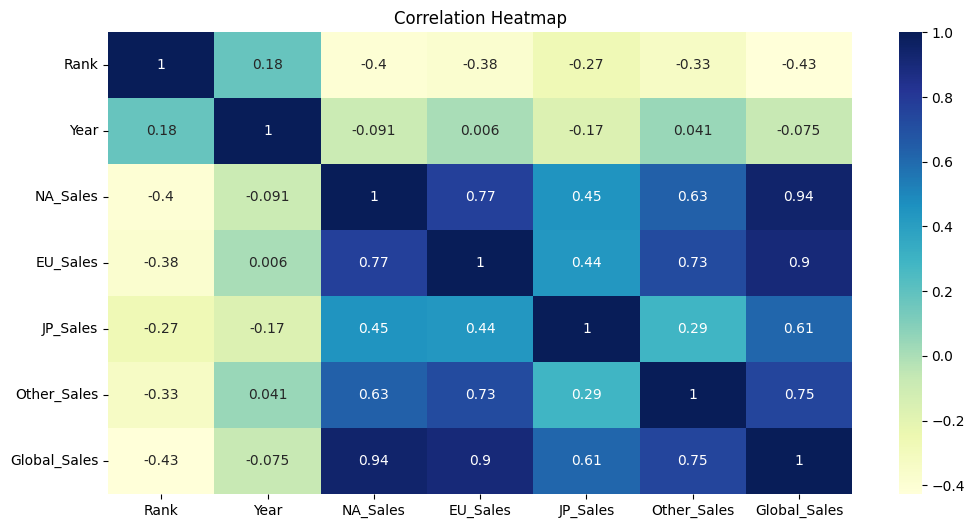

<ipython-input-1-1f39f34dccdb>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_numeric["Sales_Category"] = sales_categories
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ense

Best Model: AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42),
                   learning_rate=0.1, n_estimators=100, random_state=42)
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.9987752602571953
Confusion Matrix:
[[847   0   0   0]
 [  0 826   1   0]
 [  0   0 801   3]
 [  0   0   0 788]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
dataset = pd.read_csv("vgsales.csv")

# Exclude non-numeric columns
dataset_numeric = dataset.select_dtypes(include=[np.number])

# Data visualization
plt.figure(figsize=(12, 6))
sns.heatmap(dataset_numeric.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

# Data preprocessing
dataset_numeric = dataset_numeric.dropna()  # Remove rows with missing values

# Convert Global_Sales into sales categories
sales_categories = pd.qcut(dataset_numeric["Global_Sales"], q=4, labels=False)
dataset_numeric["Sales_Category"] = sales_categories

# Split the dataset into features (X) and target variable (y)
X = dataset_numeric.drop(["Global_Sales", "Sales_Category"], axis=1)
y = dataset_numeric["Sales_Category"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base estimator (Random Forest) for AdaBoost
base_estimator = RandomForestClassifier(random_state=42)

# Define the AdaBoost classification model with Random Forest as the base estimator
model = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.1, 0.5, 1.0]
}

# Perform grid search using stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Model:", best_model)
print("Best Parameters:", best_params)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model using accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

# Additional data visualizations
# ...


USING DECISION TREE:


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load the dataset
dataset = pd.read_csv("vgsales.csv")

# Exclude non-numeric columns
dataset_numeric = dataset.select_dtypes(include=[np.number])

# Data preprocessing
dataset_numeric = dataset_numeric.dropna()  # Remove rows with missing values

# Convert Global_Sales into sales categories
sales_categories = pd.qcut(dataset_numeric["Global_Sales"], q=4, labels=False)
dataset_numeric["Sales_Category"] = sales_categories

# Split the dataset into features (X) and target variable (y)
X = dataset_numeric.drop(["Global_Sales", "Sales_Category"], axis=1)
y = dataset_numeric["Sales_Category"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree classification model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)




Accuracy: 0.9993876301285977
Precision: 0.9993880181956898
Recall: 0.9993876301285977
F1-score: 0.9993876345919674


USING RANDOM FOREST:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load the dataset
dataset = pd.read_csv("vgsales.csv")

# Exclude non-numeric columns
dataset_numeric = dataset.select_dtypes(include=[np.number])

# Data preprocessing
dataset_numeric = dataset_numeric.dropna()  # Remove rows with missing values

# Convert Global_Sales into sales categories
sales_categories = pd.qcut(dataset_numeric["Global_Sales"], q=4, labels=False)
dataset_numeric["Sales_Category"] = sales_categories

# Split the dataset into features (X) and target variable (y)
X = dataset_numeric.drop(["Global_Sales", "Sales_Category"], axis=1)
y = dataset_numeric["Sales_Category"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest classification model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


Accuracy: 0.9990814451928965
Precision: 0.9990849289658691
Recall: 0.9990814451928965
F1-score: 0.9990814593284402


USING ADABOOST FR RF:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load the dataset
dataset = pd.read_csv("vgsales.csv")

# Exclude non-numeric columns
dataset_numeric = dataset.select_dtypes(include=[np.number])

# Data preprocessing
dataset_numeric = dataset_numeric.dropna()  # Remove rows with missing values

# Convert Global_Sales into sales categories
sales_categories = pd.qcut(dataset_numeric["Global_Sales"], q=4, labels=False)
dataset_numeric["Sales_Category"] = sales_categories

# Split the dataset into features (X) and target variable (y)
X = dataset_numeric.drop(["Global_Sales", "Sales_Category"], axis=1)
y = dataset_numeric["Sales_Category"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base estimator (Random Forest) for AdaBoost
base_estimator = RandomForestClassifier(random_state=42)

# Define the AdaBoost classification model with Random Forest as the base estimator
model = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9987752602571953
Precision: 0.9987779804767123
Recall: 0.9987752602571953
F1-score: 0.9987752776376729


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load the dataset
dataset = pd.read_csv("vgsales.csv")

# Exclude non-numeric columns
dataset_numeric = dataset.select_dtypes(include=[np.number])

# Data preprocessing
dataset_numeric = dataset_numeric.dropna()  # Remove rows with missing values

# Convert Global_Sales into sales categories
sales_categories = pd.qcut(dataset_numeric["Global_Sales"], q=4, labels=False)
dataset_numeric["Sales_Category"] = sales_categories

# Split the dataset into features (X) and target variable (y)
X = dataset_numeric.drop(["Global_Sales", "Sales_Category"], axis=1)
y = dataset_numeric["Sales_Category"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
ada_model = AdaBoostClassifier(base_estimator=rf_model, random_state=42)

# Train the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
ada_pred = ada_model.predict(X_test)

# Calculate metrics for each model
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

ada_accuracy = accuracy_score(y_test, ada_pred)
ada_precision = precision_score(y_test, ada_pred, average='weighted')
ada_recall = recall_score(y_test, ada_pred, average='weighted')
ada_f1 = f1_score(y_test, ada_pred, average='weighted')

# Compare the models
model_metrics = {
    "Decision Tree": {"Accuracy": dt_accuracy, "Precision": dt_precision, "Recall": dt_recall, "F1-score": dt_f1},
    "Random Forest": {"Accuracy": rf_accuracy, "Precision": rf_precision, "Recall": rf_recall, "F1-score": rf_f1},
    "Random Forest with AdaBoost": {"Accuracy": ada_accuracy, "Precision": ada_precision, "Recall": ada_recall, "F1-score": ada_f1}
}

# Find the best model based on accuracy
best_accuracy_model = max(model_metrics, key=lambda x: model_metrics[x]["Accuracy"])

# Find the best model based on F1-score
best_f1_model = max(model_metrics, key=lambda x: model_metrics[x]["F1-score"])

# Display the results
print("Accuracy Comparison:")
for model, metrics in model_metrics.items():
    print(f"{model}: {metrics['Accuracy']}")

print("\nF1-score Comparison:")
for model, metrics in model_metrics.items():
    print(f"{model}: {metrics['F1-score']}")

print("\nBest Model based on Accuracy:", best_accuracy_model)
print("Best Model based on F1-score:", best_f1_model)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy Comparison:
Decision Tree: 0.9993876301285977
Random Forest: 0.9990814451928965
Random Forest with AdaBoost: 0.9987752602571953

F1-score Comparison:
Decision Tree: 0.9993876345919674
Random Forest: 0.9990814593284402
Random Forest with AdaBoost: 0.9987752776376729

Best Model based on Accuracy: Decision Tree
Best Model based on F1-score: Decision Tree


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load the dataset
dataset = pd.read_csv("vgsales.csv")

# Exclude non-numeric columns
dataset_numeric = dataset.select_dtypes(include=[np.number])

# Data preprocessing
dataset_numeric = dataset_numeric.dropna()  # Remove rows with missing values

# Convert Global_Sales into sales categories
sales_categories = pd.qcut(dataset_numeric["Global_Sales"], q=4, labels=False)
dataset_numeric["Sales_Category"] = sales_categories

# Split the dataset into features (X) and target variable (y)
X = dataset_numeric.drop(["Global_Sales", "Sales_Category"], axis=1)
y = dataset_numeric["Sales_Category"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
ada_model = AdaBoostClassifier(base_estimator=rf_model, random_state=42)

# Train the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
ada_pred = ada_model.predict(X_test)

# Calculate metrics for each model
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

ada_accuracy = accuracy_score(y_test, ada_pred)
ada_precision = precision_score(y_test, ada_pred, average='weighted')
ada_recall = recall_score(y_test, ada_pred, average='weighted')
ada_f1 = f1_score(y_test, ada_pred, average='weighted')

# Compare the models
model_metrics = {
    "Decision Tree": {"Accuracy": dt_accuracy, "Precision": dt_precision, "Recall": dt_recall, "F1-score": dt_f1},
    "Random Forest": {"Accuracy": rf_accuracy, "Precision": rf_precision, "Recall": rf_recall, "F1-score": rf_f1},
    "Random Forest with AdaBoost": {"Accuracy": ada_accuracy, "Precision": ada_precision, "Recall": ada_recall, "F1-score": ada_f1}
}

# Find the best model based on accuracy
best_accuracy_model = max(model_metrics, key=lambda x: model_metrics[x]["Accuracy"])

# Find the best model based on F1-score
best_f1_model = max(model_metrics, key=lambda x: model_metrics[x]["F1-score"])

# Find the best model based on precision
best_precision_model = max(model_metrics, key=lambda x: model_metrics[x]["Precision"])

# Find the best model based on recall
best_recall_model = max(model_metrics, key=lambda x: model_metrics[x]["Recall"])

# Display the results
print("Accuracy Comparison:")
for model, metrics in model_metrics.items():
    print(f"{model}: {metrics['Accuracy']}")

print("\nPrecision Comparison:")
for model, metrics in model_metrics.items():
    print(f"{model}: {metrics['Precision']}")

print("\nRecall Comparison:")
for model, metrics in model_metrics.items():
    print(f"{model}: {metrics['Recall']}")

print("\nF1-score Comparison:")
for model, metrics in model_metrics.items():
    print(f"{model}: {metrics['F1-score']}")

print("\nBest Model based on Accuracy:", best_accuracy_model)
print("Best Model based on Precision:", best_precision_model)
print("Best Model based on Recall:", best_recall_model)
print("Best Model based on F1-score:", best_f1_model)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy Comparison:
Decision Tree: 0.9993876301285977
Random Forest: 0.9990814451928965
Random Forest with AdaBoost: 0.9987752602571953

Precision Comparison:
Decision Tree: 0.9993880181956898
Random Forest: 0.9990849289658691
Random Forest with AdaBoost: 0.9987779804767123

Recall Comparison:
Decision Tree: 0.9993876301285977
Random Forest: 0.9990814451928965
Random Forest with AdaBoost: 0.9987752602571953

F1-score Comparison:
Decision Tree: 0.9993876345919674
Random Forest: 0.9990814593284402
Random Forest with AdaBoost: 0.9987752776376729

Best Model based on Accuracy: Decision Tree
Best Model based on Precision: Decision Tree
Best Model based on Recall: Decision Tree
Best Model based on F1-score: Decision Tree


<Figure size 1000x600 with 0 Axes>

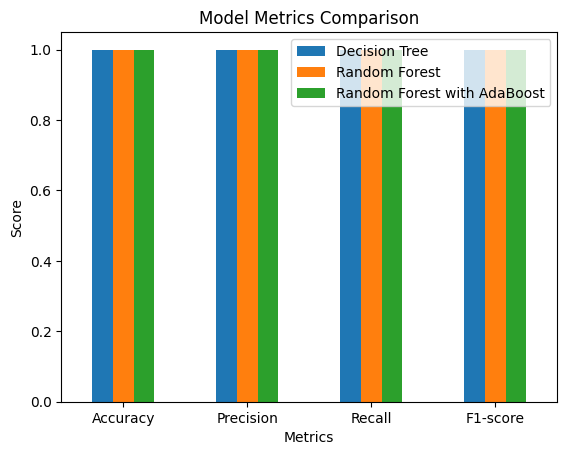

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the model metrics
model_metrics = {
    "Decision Tree": {"Accuracy": 0.9993876301285977, "Precision": 0.9993880181956898,
                      "Recall": 0.9993876301285977, "F1-score": 0.9993876345919674},
    "Random Forest": {"Accuracy": 0.9990814451928965, "Precision": 0.9990849289658691,
                      "Recall": 0.9990814451928965, "F1-score": 0.9990814593284402},
    "Random Forest with AdaBoost": {"Accuracy": 0.9987752602571953, "Precision": 0.9987779804767123,
                                    "Recall": 0.9987752602571953, "F1-score": 0.9987752776376729}
}

# Convert model metrics to a DataFrame
df = pd.DataFrame.from_dict(model_metrics, orient='index')

# Transpose the DataFrame for plotting
df = df.transpose()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart
df.plot(kind='bar', rot=0)
plt.title('Model Metrics Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')

# Show the plot
plt.show()


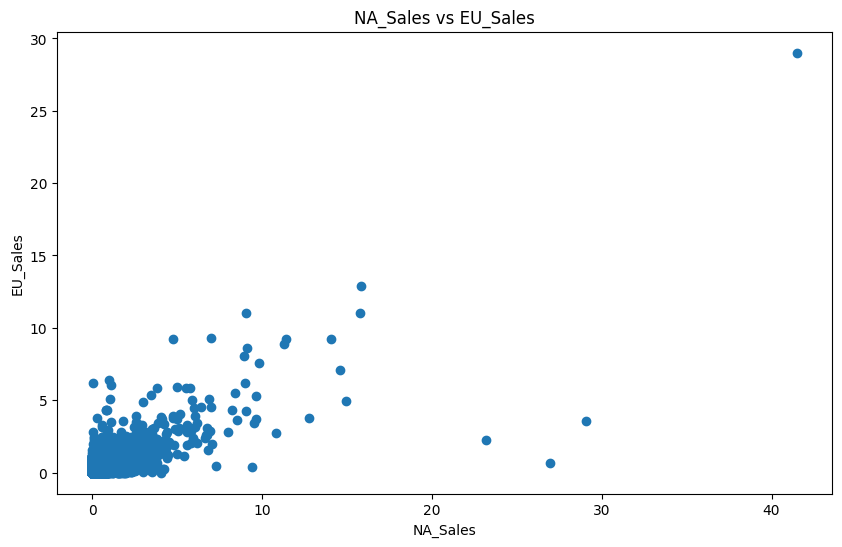

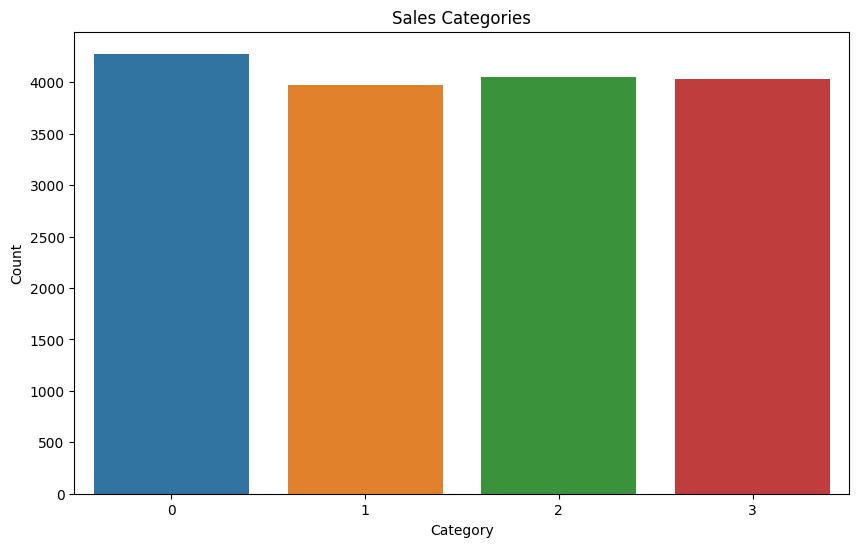

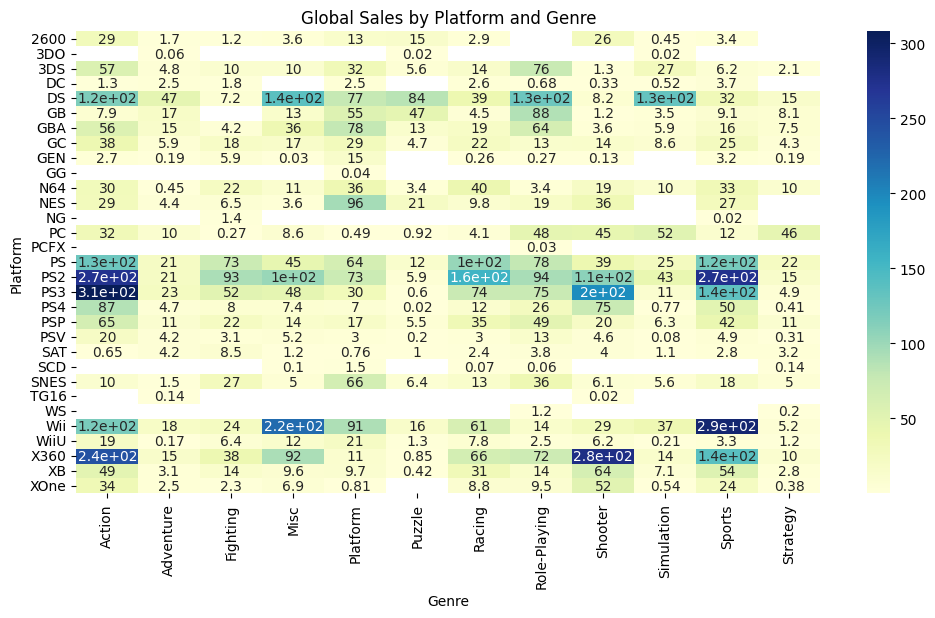

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_csv("vgsales.csv")

# Exclude non-numeric columns
dataset_numeric = dataset.select_dtypes(include=[np.number])

# Data preprocessing
dataset_numeric = dataset_numeric.dropna()  # Remove rows with missing values

# Convert Global_Sales into sales categories
sales_categories = pd.qcut(dataset_numeric["Global_Sales"], q=4, labels=False)
dataset_numeric["Sales_Category"] = sales_categories

# Scatter plot of two numeric features
plt.figure(figsize=(10, 6))
feature1 = "NA_Sales"
feature2 = "EU_Sales"
plt.scatter(dataset_numeric[feature1], dataset_numeric[feature2])
plt.title(f"{feature1} vs {feature2}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()
print()

# Bar plot of sales categories
plt.figure(figsize=(10, 6))
sns.countplot(x="Sales_Category", data=dataset_numeric)
plt.title("Sales Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
print()

# Pivot table graph
pivot_table = dataset.pivot_table(index="Platform", columns="Genre", values="Global_Sales", aggfunc=np.sum)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title("Global Sales by Platform and Genre")
plt.show()


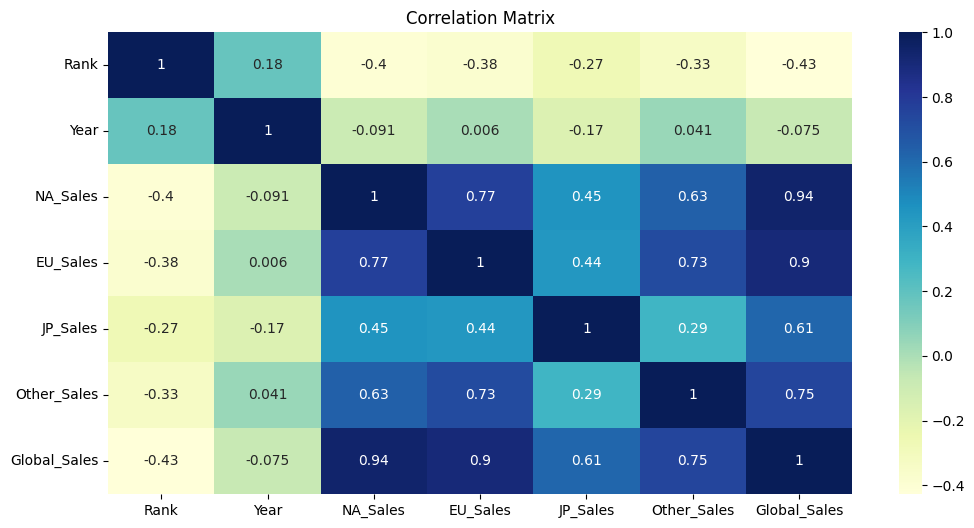

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_csv("vgsales.csv")

# Exclude non-numeric columns
dataset_numeric = dataset.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = dataset_numeric.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()


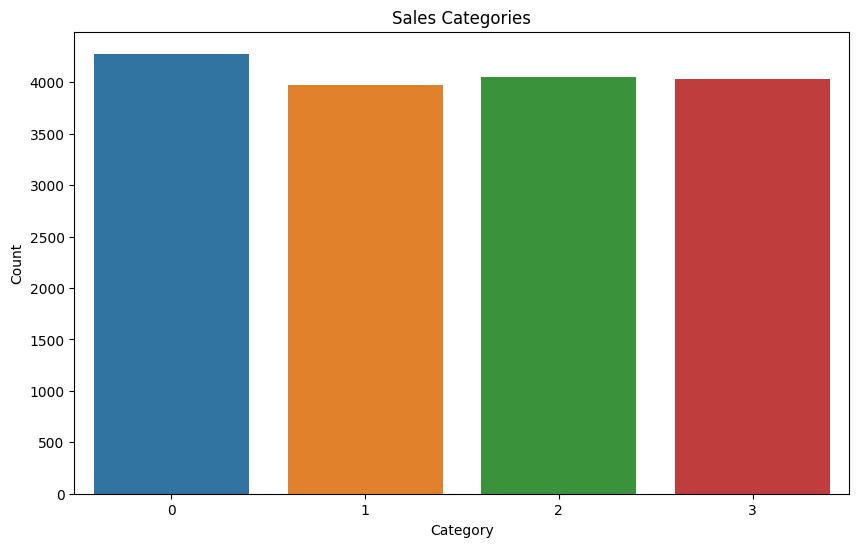

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_csv("vgsales.csv")

# Exclude non-numeric columns
dataset_numeric = dataset.select_dtypes(include=[np.number])

# Data preprocessing
dataset_numeric = dataset_numeric.dropna()  # Remove rows with missing values

# Convert Global_Sales into sales categories
sales_categories = pd.qcut(dataset_numeric["Global_Sales"], q=4, labels=False)
dataset_numeric["Sales_Category"] = sales_categories

# Bar plot of sales categories
plt.figure(figsize=(10, 6))
sns.countplot(x="Sales_Category", data=dataset_numeric)
plt.title("Sales Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


<ipython-input-16-5e5947855058>:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  dataset_numeric = dataset.select_dtypes(include=[pd.np.number])


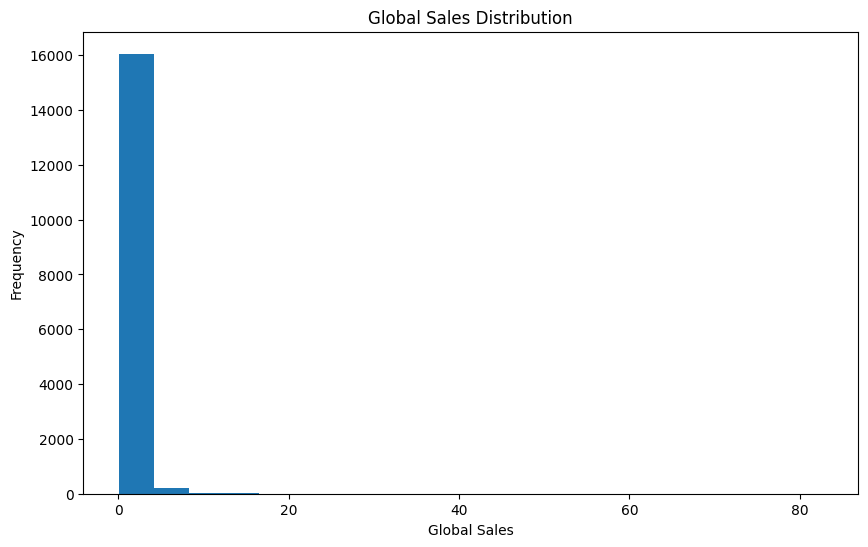

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("vgsales.csv")

# Exclude non-numeric columns
dataset_numeric = dataset.select_dtypes(include=[pd.np.number])

# Data preprocessing
dataset_numeric = dataset_numeric.dropna()  # Remove rows with missing values

# Histogram of global sales
plt.figure(figsize=(10, 6))
plt.hist(dataset_numeric["Global_Sales"], bins=20)
plt.title("Global Sales Distribution")
plt.xlabel("Global Sales")
plt.ylabel("Frequency")
plt.show()


Data Preprocessing:

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
dataset = pd.read_csv("vgsales.csv")

# Exclude non-numeric columns
dataset_numeric = dataset.select_dtypes(include=[np.number])

# Data preprocessing
dataset_numeric = dataset_numeric.dropna()  # Remove rows with missing values

# Convert Global_Sales into sales categories
sales_categories = pd.qcut(dataset_numeric["Global_Sales"], q=4, labels=False)
dataset_numeric["Sales_Category"] = sales_categories

# Split the dataset into features (X) and target variable (y)
X = dataset_numeric.drop(["Global_Sales", "Sales_Category"], axis=1)
y = dataset_numeric["Sales_Category"]


Machine Learning Models:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Define the models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
ada_model = AdaBoostClassifier(base_estimator=rf_model, random_state=42)


Model Evaluation Metrics:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train and evaluate the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
ada_pred = ada_model.predict(X_test)

# Calculate metrics for each model
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
ada_accuracy = accuracy_score(y_test, ada_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model Comparison and Results:

In [ ]:
# Compare the models
model_metrics = {
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy,
    "Random Forest with AdaBoost": ada_accuracy
}

# Find the best model based on accuracy
best_accuracy_model = max(model_metrics, key=model_metrics.get)


Data Visualization:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dataset_numeric.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

# Sales Categories Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x="Sales_Category", data=dataset_numeric)
plttitle("Sales Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Global Sales Distribution Histogram
plt.figure(figsize=(10, 6))
plt.hist(dataset_numeric["Global_Sales"], bins=20)
plt.title("Global Sales Distribution")
plt.xlabel("Global Sales")
plt.ylabel("Frequency")
plt.show()


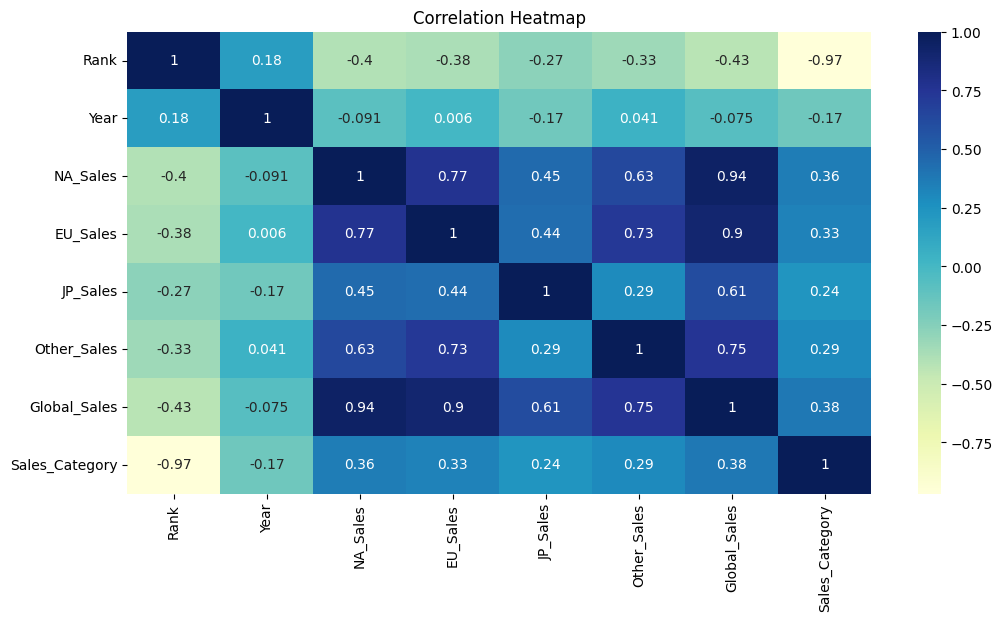

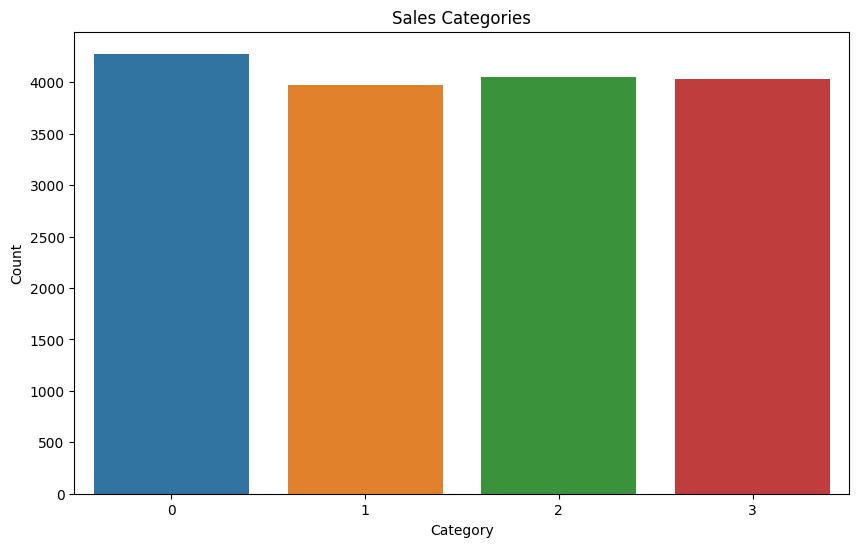

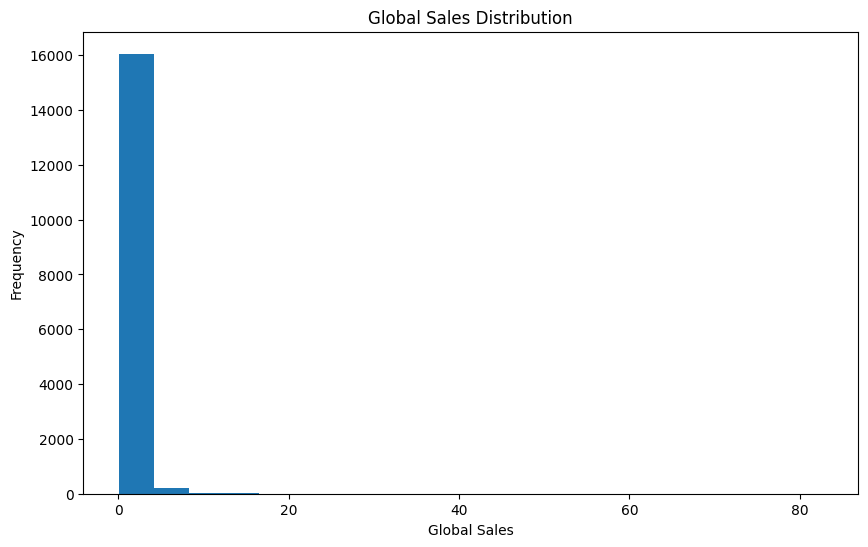

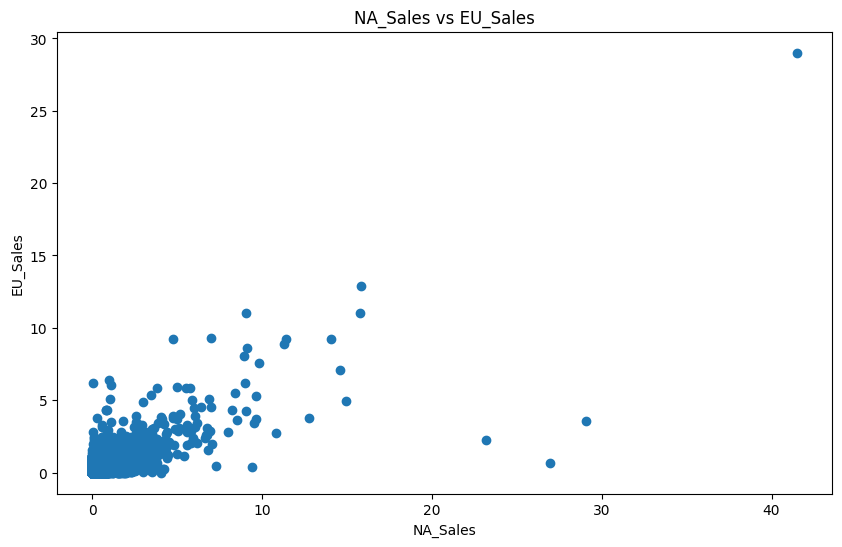

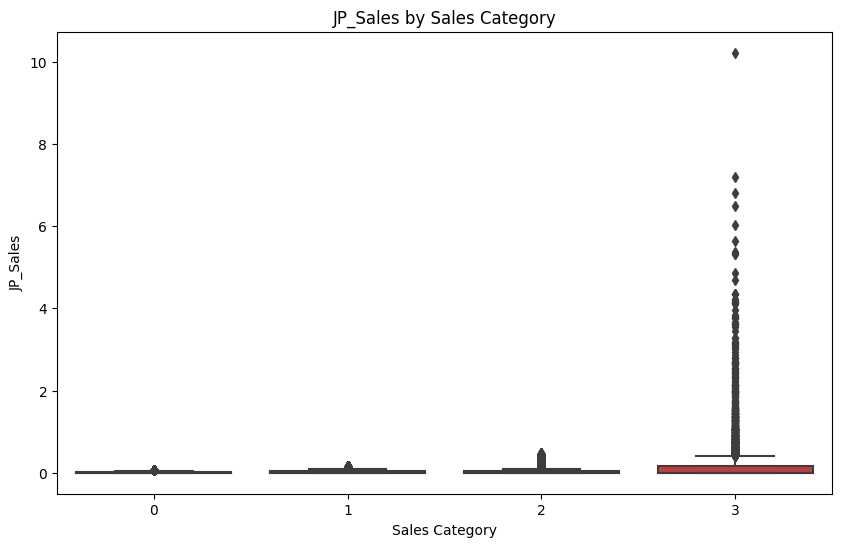

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_csv("vgsales.csv")

# Data preprocessing
dataset_numeric = dataset.select_dtypes(include=[np.number])
dataset_numeric = dataset_numeric.dropna()  # Remove rows with missing values

# Convert Global_Sales into sales categories
sales_categories = pd.qcut(dataset_numeric["Global_Sales"], q=4, labels=False)
dataset_numeric["Sales_Category"] = sales_categories

# Visualizations
# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dataset_numeric.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

# Sales Categories Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x="Sales_Category", data=dataset_numeric)
plt.title("Sales Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Global Sales Distribution Histogram
plt.figure(figsize=(10, 6))
plt.hist(dataset_numeric["Global_Sales"], bins=20)
plt.title("Global Sales Distribution")
plt.xlabel("Global Sales")
plt.ylabel("Frequency")
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 6))
feature1 = "NA_Sales"
feature2 = "EU_Sales"
plt.scatter(dataset_numeric[feature1], dataset_numeric[feature2])
plt.title(f"{feature1} vs {feature2}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
numeric_feature = "JP_Sales"
sns.boxplot(x="Sales_Category", y=numeric_feature, data=dataset_numeric)
plt.title(f"{numeric_feature} by Sales Category")
plt.xlabel("Sales Category")
plt.ylabel(numeric_feature)
plt.show()


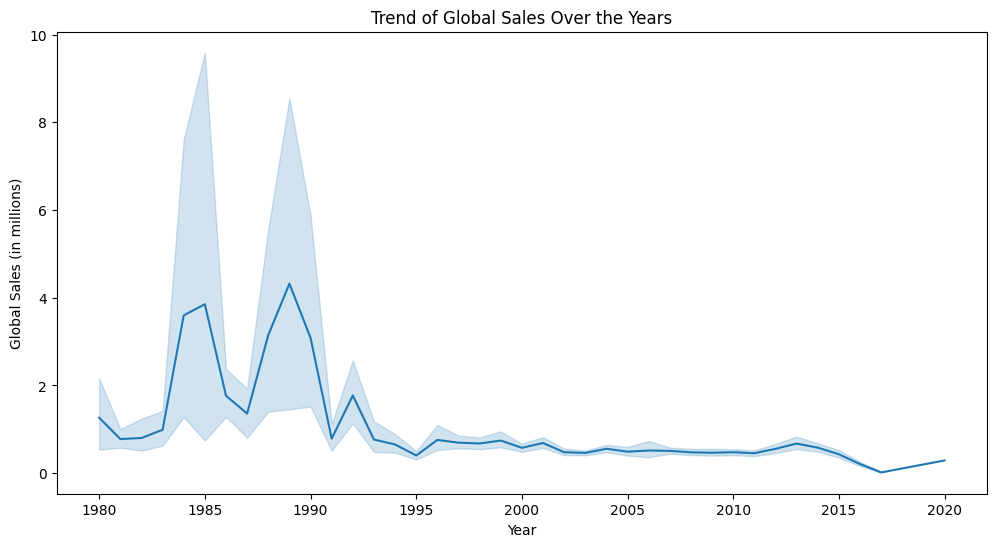

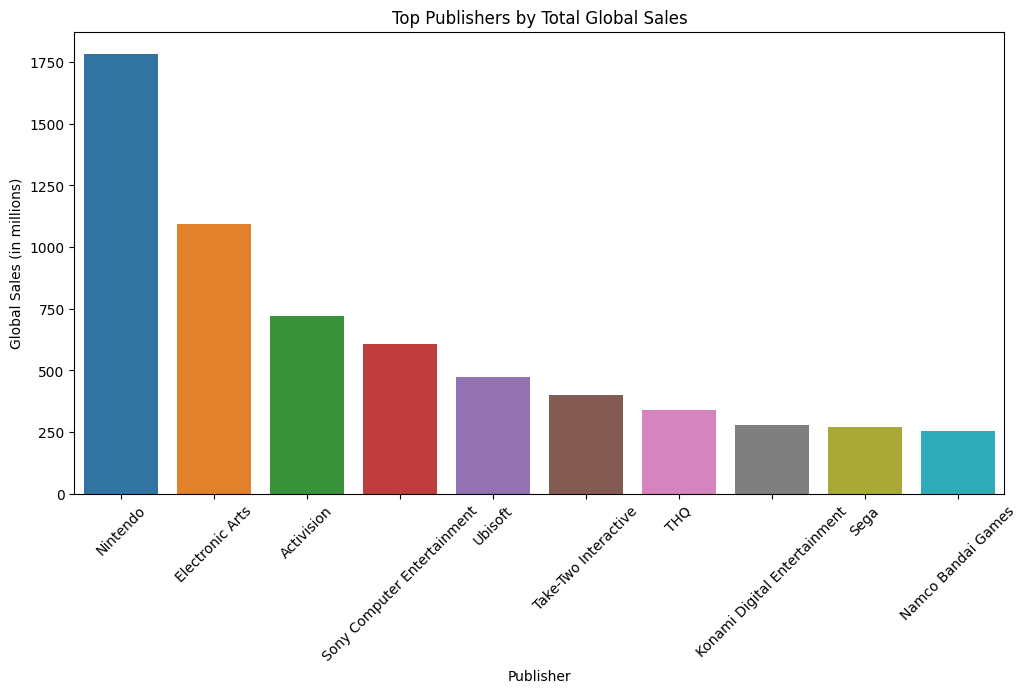

ValueError: ignored

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_csv("vgsales.csv")

# Data preprocessing
dataset = dataset.dropna()  # Remove rows with missing values

# Line plot of global sales over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Global_Sales", data=dataset)
plt.title("Trend of Global Sales Over the Years")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.show()

# Bar plot of top publishers by total global sales
top_publishers = dataset.groupby("Publisher")["Global_Sales"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title("Top Publishers by Total Global Sales")
plt.xlabel("Publisher")
plt.ylabel("Global Sales (in millions)")
plt.xticks(rotation=45)
plt.show()

# Scatter plot of global sales vs. critic scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Critic_Score", y="Global_Sales", data=dataset)
plt.title("Global Sales vs. Critic Scores")
plt.xlabel("Critic Score")
plt.ylabel("Global Sales (in millions)")
plt.show()


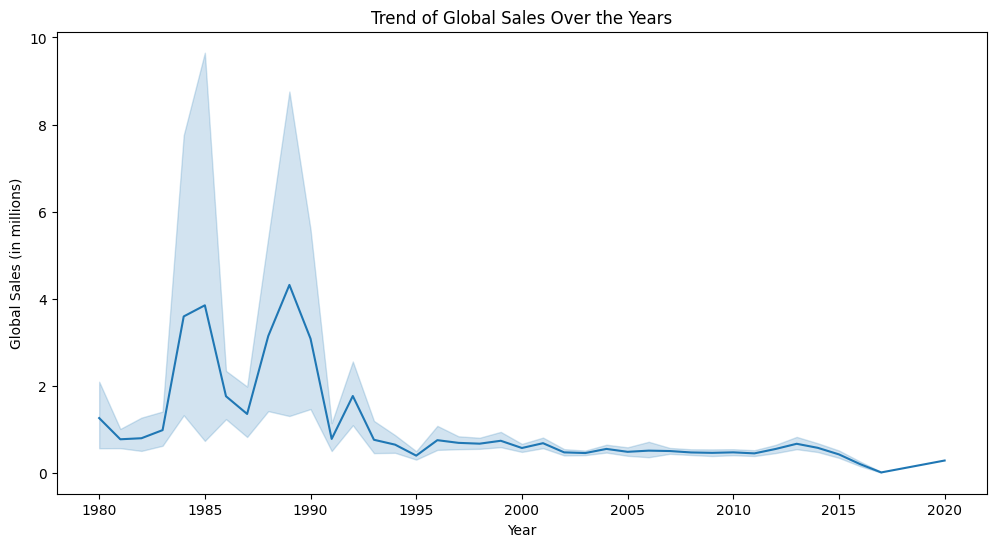

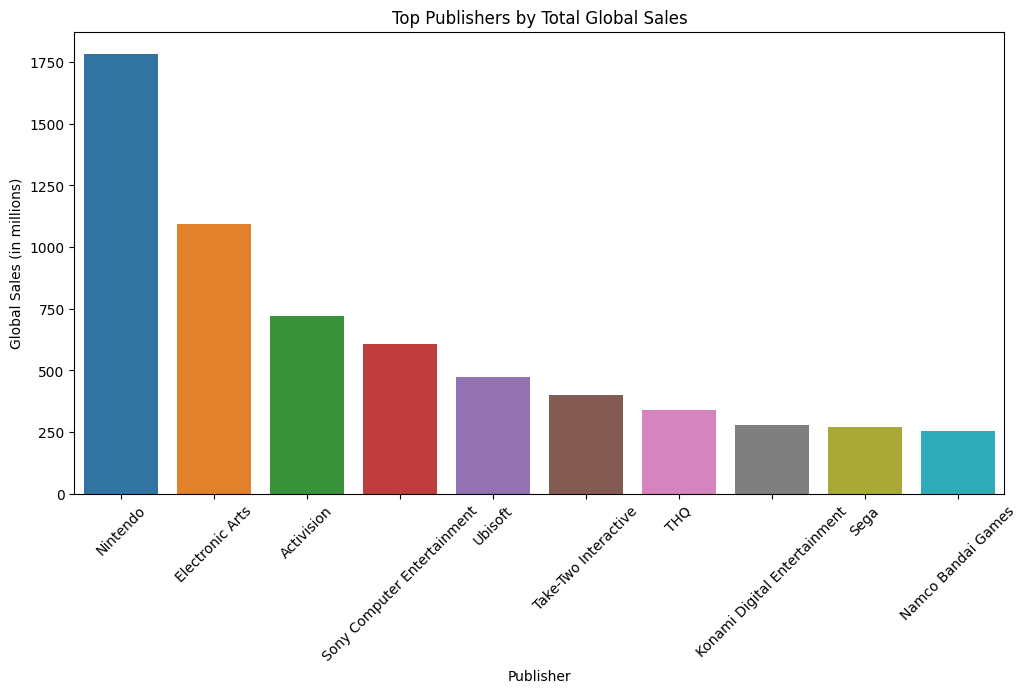

ValueError: ignored

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_csv("vgsales.csv")

# Data preprocessing
dataset = dataset.dropna()  # Remove rows with missing values

# Line plot of global sales over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Global_Sales", data=dataset)
plt.title("Trend of Global Sales Over the Years")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.show()
print()
print()

# Bar plot of top publishers by total global sales
top_publishers = dataset.groupby("Publisher")["Global_Sales"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title("Top Publishers by Total Global Sales")
plt.xlabel("Publisher")
plt.ylabel("Global Sales (in millions)")
plt.xticks(rotation=45)
plt.show()

# Scatter plot of global sales vs. user scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x="User_Score", y="Global_Sales", data=dataset)
plt.title("Global Sales vs. User Scores")
plt.xlabel("User Score")
plt.ylabel("Global Sales (in millions)")
plt.show()


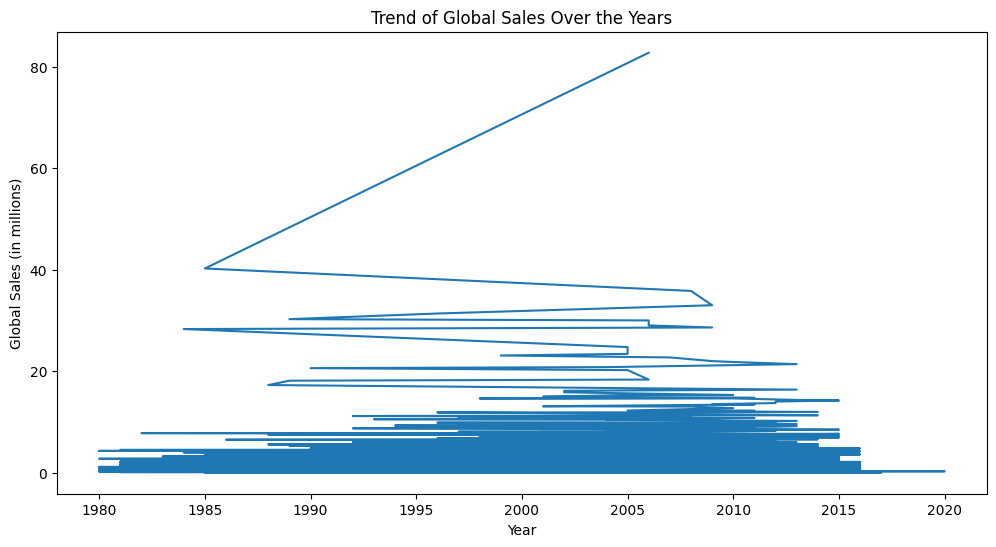

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("vgsales.csv")

# Data preprocessing
dataset = dataset.dropna()  # Remove rows with missing values

# Line plot of global sales over the years
plt.figure(figsize=(12, 6))
plt.plot(dataset["Year"], dataset["Global_Sales"])
plt.title("Trend of Global Sales Over the Years")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.show()
